### Much of the repetitive code in this notebook was written by ChatGPT, including the following summary

## Summary of the Process for Hurricane harvey Data Analysis
(same thing for Dorian)

### Step 1: Load the Dataset
- Action: Load the `harvey` dataset using `pandas.read_csv()`, skipping unnecessary rows.
- Time Intervals: `201703`, `20190830`.

### Step 2: Rename Columns
- Rename columns to reflect the time intervals and land types (dense vegetation, sparse vegetation, sand, water).

### Step 3: Calculate Total Areas for Each Time Interval
- For each time interval, sum the columns related to the four land types (dense vegetation, sparse vegetation, sand, water) to get the total area.

### Step 4: Calculate Fractional Areas
- Divide the area of each land type by the total area for each time interval to calculate the fractional areas for each land type.

### Step 5: Calculate Actual Vegetation Areas
- Multiply the `area_m2` by the fractional values for dense and sparse vegetation to get the actual areas for both time intervals.

### Step 6: Sum the Total Vegetation Areas
- Sum the dense and sparse vegetation areas for each time interval to get the total vegetation area.

### Step 7: Create a DataFrame for Summarized Data
- Create a new DataFrame `veg_area_df_harvey` to store the total vegetation area for both time intervals.

### Step 8: Plot the Total Vegetation Area Over Time
- Plot the total vegetation areas over the two time intervals (`201703`, `20190830`).

### Step 9: Save the DataFrame to a CSV File
- Save the summarized DataFrame (`veg_area_df_harvey`) as a CSV file: `harvey_vegetation_area_sums.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dorian = pd.read_csv('Supplemental_Table_Dorian.csv', skiprows=3, header=None )
# Drop columns 6, 11, and 16 (remember, pandas uses 0-based indexing, so columns 6, 11, 16 are 5, 10, 15 in code)
dorian = dorian.drop(dorian.columns[[6, 11, 16]], axis=1)
col_names = ['num','area_m2', '20190830_dense_veg','20190830_sparse_veg','20190830_sand','20190830_water',    '20191011_dense_veg','20191011_sparse_veg','20191011_sand','20191011_water',\
                              '20200928_dense_veg','20200928_sparse_veg','20200928_sand','20200928_water',    '20221020_dense_veg','20221020_sparse_veg','20221020_sand','20221020_water']
dorian.columns = col_names
dorian

,num,area_m2,20190830_dense_veg,20190830_sparse_veg,20190830_sand,20190830_water,20191011_dense_veg,20191011_sparse_veg,20191011_sand,20191011_water,20200928_dense_veg,20200928_sparse_veg,20200928_sand,20200928_water,20221020_dense_veg,20221020_sparse_veg,20221020_sand,20221020_water
0,1,3045,1223,4281,6738,0,1309,1778,4082,5096,481,1047,10694,0,560,1815,9870,0
1,2,13697,1709,24125,29304,0,2003,1918,29169,21718,1199,2507,49362,2155,2156,3252,48896,594
2,3,7891,1290,16588,13966,0,2159,2271,17371,9768,301,2173,28655,769,672,2267,28554,141
3,4,2646,896,4909,4936,0,1032,753,1934,6864,187,1269,9330,0,216,652,9758,0
4,5,7157,1717,10235,16952,0,2847,1821,9025,14937,925,2984,22083,2993,1450,2716,24346,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,483,208,660,1107,0,164,207,1548,3,50,226,1737,0,188,334,1458,0
79,80,38893,58159,50918,47630,0,19902,7292,31842,96544,13901,15326,54867,72939,21814,17860,54380,61868
80,81,30177,23164,51088,47241,0,10603,5662,36647,67794,5192,10015,57454,49003,14758,14074,50937,41119
81,82,18049,15041,29949,27597,0,8103,1973,9058,53063,3731,5267,25175,38541,14262,8388,21841,27830


In [21]:
# From chatGPT:
# Sum columns from '20190830_dense_veg' to '20190830_water' (columns 3 to 6)
dorian['20190830_total'] = dorian[['20190830_dense_veg', '20190830_sparse_veg', '20190830_sand', '20190830_water']].sum(axis=1)

# Sum columns from '20191011_dense_veg' to '20191011_water' (columns 7 to 10)
dorian['20191011_total'] = dorian[['20191011_dense_veg', '20191011_sparse_veg', '20191011_sand', '20191011_water']].sum(axis=1)

# Sum columns from '20200928_dense_veg' to '20200928_water' (columns 11 to 14)
dorian['20200928_total'] = dorian[['20200928_dense_veg', '20200928_sparse_veg', '20200928_sand', '20200928_water']].sum(axis=1)

# Sum columns from '20221020_dense_veg' to '20221020_water' (columns 19 to 22)
dorian['20221020_total'] = dorian[['20221020_dense_veg', '20221020_sparse_veg', '20221020_sand', '20221020_water']].sum(axis=1)

,num,area_m2,20190830_dense_veg,20190830_sparse_veg,20190830_sand,20190830_water,20191011_dense_veg,20191011_sparse_veg,20191011_sand,20191011_water,...,20200928_sand,20200928_water,20221020_dense_veg,20221020_sparse_veg,20221020_sand,20221020_water,20190830_total,20191011_total,20200928_total,20221020_total
0,1,3045,1223,4281,6738,0,1309,1778,4082,5096,...,10694,0,560,1815,9870,0,12242,12265,12222,12245
1,2,13697,1709,24125,29304,0,2003,1918,29169,21718,...,49362,2155,2156,3252,48896,594,55138,54808,55223,54898
2,3,7891,1290,16588,13966,0,2159,2271,17371,9768,...,28655,769,672,2267,28554,141,31844,31569,31898,31634
3,4,2646,896,4909,4936,0,1032,753,1934,6864,...,9330,0,216,652,9758,0,10741,10583,10786,10626
4,5,7157,1717,10235,16952,0,2847,1821,9025,14937,...,22083,2993,1450,2716,24346,195,28904,28630,28985,28707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,483,208,660,1107,0,164,207,1548,3,...,1737,0,188,334,1458,0,1975,1922,2013,1980
79,80,38893,58159,50918,47630,0,19902,7292,31842,96544,...,54867,72939,21814,17860,54380,61868,156707,155580,157033,155922
80,81,30177,23164,51088,47241,0,10603,5662,36647,67794,...,57454,49003,14758,14074,50937,41119,121493,120706,121664,120888
81,82,18049,15041,29949,27597,0,8103,1973,9058,53063,...,25175,38541,14262,8388,21841,27830,72587,72197,72714,72321


In [23]:
# Calculate the veg fraction for all period  ##change this
dorian['20190830_veg_frac'] = (dorian['20190830_dense_veg']+dorian['20190830_sparse_veg']) / dorian['20190830_total']

# Calculate the fractions for the '20191011' period
dorian['20191011_dense_veg_frac'] = dorian['20191011_dense_veg'] / dorian['20191011_total']
dorian['20191011_sparse_veg_frac'] = dorian['20191011_sparse_veg'] / dorian['20191011_total']
dorian['20191011_sand_frac'] = dorian['20191011_sand'] / dorian['20191011_total']
dorian['20191011_water_frac'] = dorian['20191011_water'] / dorian['20191011_total']

# Calculate the fractions for the '20200928' period
dorian['20200928_dense_veg_frac'] = dorian['20200928_dense_veg'] / dorian['20200928_total']
dorian['20200928_sparse_veg_frac'] = dorian['20200928_sparse_veg'] / dorian['20200928_total']
dorian['20200928_sand_frac'] = dorian['20200928_sand'] / dorian['20200928_total']
dorian['20200928_water_frac'] = dorian['20200928_water'] / dorian['20200928_total']

# Calculate the fractions for the '20221020' period
dorian['20221020_dense_veg_frac'] = dorian['20221020_dense_veg'] / dorian['20221020_total']
dorian['20221020_sparse_veg_frac'] = dorian['20221020_sparse_veg'] / dorian['20221020_total']
dorian['20221020_sand_frac'] = dorian['20221020_sand'] / dorian['20221020_total']
dorian['20221020_water_frac'] = dorian['20221020_water'] / dorian['20221020_total']


In [25]:
# For the '20190830' time period
dorian['20190830_dense_veg_area'] = dorian['area_m2'] * dorian['20190830_dense_veg_frac']
dorian['20190830_sparse_veg_area'] = dorian['area_m2'] * dorian['20190830_sparse_veg_frac']
dorian['20190830_sand_area'] = dorian['area_m2'] * dorian['20190830_sand_frac']
dorian['20190830_water_area'] = dorian['area_m2'] * dorian['20190830_water_frac']

# For the '20191011' time period
dorian['20191011_dense_veg_area'] = dorian['area_m2'] * dorian['20191011_dense_veg_frac']
dorian['20191011_sparse_veg_area'] = dorian['area_m2'] * dorian['20191011_sparse_veg_frac']
dorian['20191011_sand_area'] = dorian['area_m2'] * dorian['20191011_sand_frac']
dorian['20191011_water_area'] = dorian['area_m2'] * dorian['20191011_water_frac']

# For the '20200928' time period
dorian['20200928_dense_veg_area'] = dorian['area_m2'] * dorian['20200928_dense_veg_frac']
dorian['20200928_sparse_veg_area'] = dorian['area_m2'] * dorian['20200928_sparse_veg_frac']
dorian['20200928_sand_area'] = dorian['area_m2'] * dorian['20200928_sand_frac']
dorian['20200928_water_area'] = dorian['area_m2'] * dorian['20200928_water_frac']

# For the '20221020' time period
dorian['20221020_dense_veg_area'] = dorian['area_m2'] * dorian['20221020_dense_veg_frac']
dorian['20221020_sparse_veg_area'] = dorian['area_m2'] * dorian['20221020_sparse_veg_frac']
dorian['20221020_sand_area'] = dorian['area_m2'] * dorian['20221020_sand_frac']
dorian['20221020_water_area'] = dorian['area_m2'] * dorian['20221020_water_frac']
dorian

,num,area_m2,20190830_dense_veg,20190830_sparse_veg,20190830_sand,20190830_water,20191011_dense_veg,20191011_sparse_veg,20191011_sand,20191011_water,...,20191011_sand_area,20191011_water_area,20200928_dense_veg_area,20200928_sparse_veg_area,20200928_sand_area,20200928_water_area,20221020_dense_veg_area,20221020_sparse_veg_area,20221020_sand_area,20221020_water_area
0,1,3045,1223,4281,6738,0,1309,1778,4082,5096,...,1013.427640,1265.170811,119.836770,260.850515,2664.312715,0.000000,139.256840,451.341364,2454.401797,0.000000
1,2,13697,1709,24125,29304,0,2003,1918,29169,21718,...,7289.588983,5427.518720,297.388823,621.812995,12243.291998,534.506184,537.919997,811.370979,12199.506576,148.202448
2,3,7891,1290,16588,13966,0,2159,2271,17371,9768,...,4342.062181,2441.613228,74.462067,537.561697,7088.739263,190.236974,167.628248,565.495890,7122.703863,35.171998
3,4,2646,896,4909,4936,0,1032,753,1934,6864,...,483.545686,1716.162147,45.874467,311.308548,2288.816985,0.000000,53.786561,162.355731,2429.857708,0.000000
4,5,7157,1717,10235,16952,0,2847,1821,9025,14937,...,2256.092386,3733.989137,228.401760,736.811730,5452.752493,739.034018,361.502421,677.131431,6069.750305,48.615843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,483,208,660,1107,0,164,207,1548,3,...,389.013528,0.753902,11.997019,54.226528,416.776453,0.000000,45.860606,81.475758,355.663636,0.000000
79,80,38893,58159,50918,47630,0,19902,7292,31842,96544,...,7960.090667,24134.758915,3442.917049,3795.852579,13589.132418,18065.097954,5441.258463,4454.977360,13564.483139,15432.281038
80,81,30177,23164,51088,47241,0,10603,5662,36647,67794,...,9161.901803,16948.780823,1287.800697,2484.076267,14250.635833,12154.487202,3684.006403,3513.261018,12715.288937,10264.443642
81,82,18049,15041,29949,27597,0,8103,1973,9058,53063,...,2264.468634,13265.566256,926.105275,1307.369736,6248.914583,9566.610405,3559.337371,2093.375534,5450.812475,6945.474620


In [51]:
# Calculate total area (constant for all time periods)
total_area_sum = dorian['area_m2'].sum()

# Calculate total vegetation area (dense + sparse) for each time period
dorian['20190830_total_veg_area'] = dorian['20190830_dense_veg_area'] + dorian['20190830_sparse_veg_area']
dorian['20191011_total_veg_area'] = dorian['20191011_dense_veg_area'] + dorian['20191011_sparse_veg_area']
dorian['20200928_total_veg_area'] = dorian['20200928_dense_veg_area'] + dorian['20200928_sparse_veg_area']
dorian['20221020_total_veg_area'] = dorian['20221020_dense_veg_area'] + dorian['20221020_sparse_veg_area']

# Calculate area-weighted veg fraction for each time period
dorian['20190830_weighted_frac_veg_area'] = dorian['20190830_total_veg_area']*dorian['area_m2']/total_area_sum 
dorian['20191011_weighted_frac_veg_area'] = dorian['20191011_total_veg_area']*dorian['area_m2']/total_area_sum 
dorian['20200928_weighted_frac_veg_area'] = dorian['20200928_total_veg_area']*dorian['area_m2']/total_area_sum 
dorian['20221020_weighted_frac_veg_area'] = dorian['20221020_total_veg_area']*dorian['area_m2']/total_area_sum 

# Calculate the average fraction down all rows for each time interval
veg_area_fracs = {
    '20190830': (dorian['20190830_total_veg_area']/dorian['area_m2']).mean(),
    '20191011': (dorian['20191011_total_veg_area']/dorian['area_m2']).mean(),
    '20200928': (dorian['20200928_total_veg_area']/dorian['area_m2']).mean(),
    '20221020': (dorian['20221020_total_veg_area']/dorian['area_m2']).mean()
}

veg_area_fracs_check = {
    '20190830': (dorian['20190830_weighted_frac_veg_area']).mean(),
    '20191011': (dorian['20191011_weighted_frac_veg_area']).mean(),
    '20200928': (dorian['20200928_weighted_frac_veg_area']).mean(),
    '20221020': (dorian['20221020_weighted_frac_veg_area']).mean()
}

# Sum the vegetation areas down all rows for each time interval
veg_area_sums = {
    '20190830': dorian['20190830_total_veg_area'].sum(),
    '20191011': dorian['20191011_total_veg_area'].sum(),
    '20200928': dorian['20200928_total_veg_area'].sum(),
    '20221020': dorian['20221020_total_veg_area'].sum()
}

# Calculate vegetation fraction sums for each time period
veg_frac_sums = {key: veg_area_sums[key] / total_area_sum for key in veg_area_sums}
print(veg_frac_sums)
print(veg_area_fracs)
print(veg_area_fracs_check)

{'20190830': np.float64(0.5517541915701236), '20191011': np.float64(0.1281202647939453), '20200928': np.float64(0.1315715550366831), '20221020': np.float64(0.23583532977898897)}
{'20190830': np.float64(0.4408902901063279), '20191011': np.float64(0.1471822996474505), '20200928': np.float64(0.1269668370139748), '20221020': np.float64(0.2012357689887548)}
{'20190830': np.float64(229.0142635871923), '20191011': np.float64(46.82003971779648), '20200928': np.float64(49.912371192612525), '20221020': np.float64(97.49332555598147)}


In [48]:
# Create a DataFrame for easy plotting
veg_area_df_dorian = pd.DataFrame([list(veg_area_sums.items()), list(veg_area_fracs.items()), list(veg_frac_sums.items())], columns=['Time Interval', 'Total Veg Area m2', 'Weighted Veg Area Fracs', 'Mean Veg Area Fracs'])

# Save the veg_area_df as a CSV file
veg_area_df_dorian.to_csv('Dorian_vegetation_area_sums.csv', index=False)

# Verify that the file was saved correctly by printing a success message
print("CSV file 'Dorian_vegetation_area_sums.csv' has been saved successfully.")
veg_area_df_dorian

CSV file 'Dorian_vegetation_area_sums.csv' has been saved successfully.


,Time Interval,Total Veg Area m2,Weighted Veg Area Fracs,Mean Veg Area Fracs
0,"(20190830, 604154.2871435382)","(20191011, 140287.8463414263)","(20200928, 144066.9056185169)","(20221020, 258232.61104809956)"
1,"(20190830, 0.4408902901063279)","(20191011, 0.1471822996474505)","(20200928, 0.1269668370139748)","(20221020, 0.2012357689887548)"
2,"(20190830, 0.5517541915701236)","(20191011, 0.1281202647939453)","(20200928, 0.1315715550366831)","(20221020, 0.23583532977898897)"


In [49]:
list(veg_area_sums.items())

[('20190830', np.float64(604154.2871435382)),
 ('20191011', np.float64(140287.8463414263)),
 ('20200928', np.float64(144066.9056185169)),
 ('20221020', np.float64(258232.61104809956))]

                    Time Interval               Total Veg Area m2  \
0   (20190830, 604154.2871435382)   (20191011, 140287.8463414263)   
1  (20190830, 0.4408902901063279)  (20191011, 0.1471822996474505)   
2  (20190830, 0.5517541915701236)  (20191011, 0.1281202647939453)   

          Weighted Veg Area Fracs              Mean Veg Area Fracs  
0   (20200928, 144066.9056185169)   (20221020, 258232.61104809956)  
1  (20200928, 0.1269668370139748)   (20221020, 0.2012357689887548)  
2  (20200928, 0.1315715550366831)  (20221020, 0.23583532977898897)  
CSV file 'Dorian_vegetation_area_sums.csv' has been saved successfully.


TypeError: 'value' must be an instance of str or bytes, not a tuple

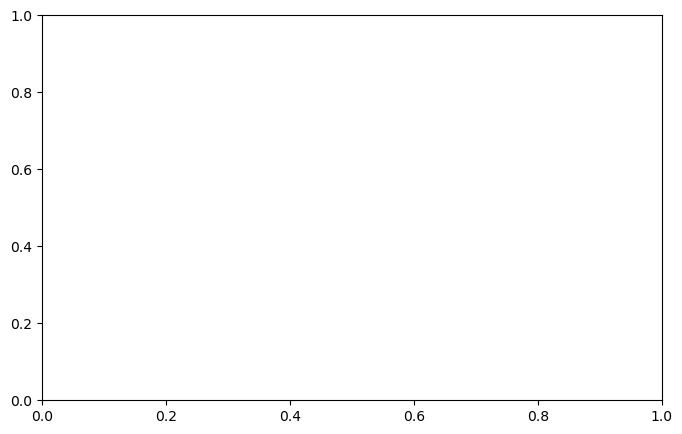

In [ ]:
# Plotting the total vegetation area over the four time intervals
plt.figure(figsize=(8, 5))
plt.plot(veg_area_df_dorian['Time Interval'], veg_area_df['Total Veg Area'], marker='o', color='green')
plt.title('Total Vegetation Area Over Time')
plt.xlabel('Time Interval')
plt.ylabel('Total Vegetation Area (m²)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

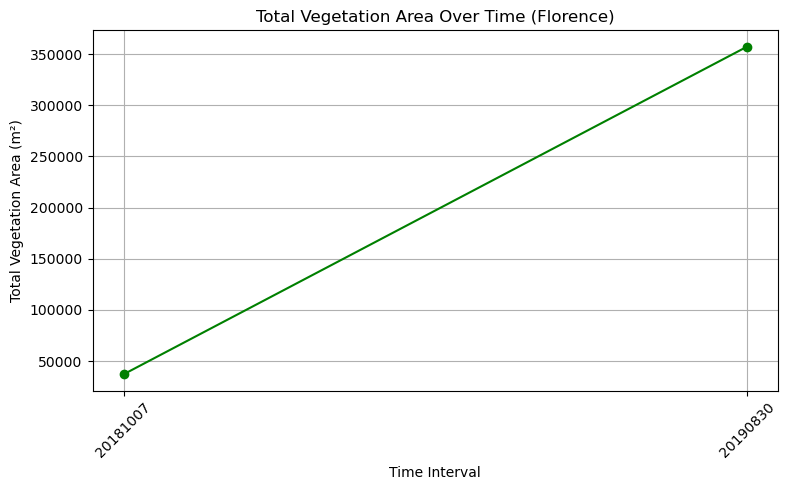

CSV file 'florence_vegetation_area_sums.csv' has been saved successfully.


In [29]:
# 1. Load the harvey dataset and skip the necessary rows if needed
# Adjust the path to your CSV file
harvey = pd.read_csv('Supplemental_Table_harvey.csv', skiprows=3, header=None)
harvey = harvey.drop(harvey.columns[[6, 11]], axis=1)
# 2. Rename the columns (only 201703 and 20190830 time intervals)
col_names_harvey = ['num', 'area_m2', '201703_dense_veg', '201703_sparse_veg', '201703_sand', '201703_water',
                      '20190830_dense_veg', '20190830_sparse_veg', '20190830_sand', '20190830_water']
harvey.columns = col_names_harvey

# 3. Calculate fractional areas for 201703 and 20190830
# Sum columns to get the total for each time interval
harvey['201703_total'] = harvey[['201703_dense_veg', '201703_sparse_veg', '201703_sand', '201703_water']].sum(axis=1)
harvey['20190830_total'] = harvey[['20190830_dense_veg', '20190830_sparse_veg', '20190830_sand', '20190830_water']].sum(axis=1)

# Calculate fractions
harvey['201703_dense_veg_frac'] = harvey['201703_dense_veg'] / harvey['201703_total']
harvey['201703_sparse_veg_frac'] = harvey['201703_sparse_veg'] / harvey['201703_total']
harvey['20190830_dense_veg_frac'] = harvey['20190830_dense_veg'] / harvey['20190830_total']
harvey['20190830_sparse_veg_frac'] = harvey['20190830_sparse_veg'] / harvey['20190830_total']

# 4. Multiply area_m2 by the fractional columns to calculate actual areas
# For the 201703 time interval
harvey['201703_dense_veg_area'] = harvey['area_m2'] * harvey['201703_dense_veg_frac']
harvey['201703_sparse_veg_area'] = harvey['area_m2'] * harvey['201703_sparse_veg_frac']

# For the 20190830 time interval
harvey['20190830_dense_veg_area'] = harvey['area_m2'] * harvey['20190830_dense_veg_frac']
harvey['20190830_sparse_veg_area'] = harvey['area_m2'] * harvey['20190830_sparse_veg_frac']

# 5. Sum vegetation areas for each time interval
harvey['201703_total_veg_area'] = harvey['201703_dense_veg_area'] + harvey['201703_sparse_veg_area']
harvey['20190830_total_veg_area'] = harvey['20190830_dense_veg_area'] + harvey['20190830_sparse_veg_area']

# Sum down all rows for each time interval
veg_area_sums_harvey = {
    '201703': harvey['201703_total_veg_area'].sum(),
    '20190830': harvey['20190830_total_veg_area'].sum()
}

# 6. Create a DataFrame for easy plotting
veg_area_df_harvey = pd.DataFrame(list(veg_area_sums_harvey.items()), columns=['Time Interval', 'Total Veg Area'])

# 7. Plot the total vegetation area over the two time intervals
plt.figure(figsize=(8, 5))
plt.plot(veg_area_df_harvey['Time Interval'], veg_area_df_harvey['Total Veg Area'], marker='o', color='green')
plt.title('Total Vegetation Area Over Time (harvey)')
plt.xlabel('Time Interval')
plt.ylabel('Total Vegetation Area (m²)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Save the veg_area_df_harvey as a CSV file
veg_area_df_harvey.to_csv('harvey_vegetation_area_sums.csv', index=False)

# Verify that the file was saved correctly by printing a success message
print("CSV file 'harvey_vegetation_area_sums.csv' has been saved successfully.")

In [33]:
harvey = pd.read_csv('Supplemental_Table_Harvey.csv', skiprows=2 )
col_names_harvey = ['num', 'area_m2', '201703_veg', '201703_sand', '201703_water','201708_veg', '201708_sand', '201708_water',
                                      '202001_veg', '202001_sand', '202001_water','202203_veg', '202203_sand', '202203_water',
                                      '202306_veg', '202306_sand', '202306_water' ]
                      

,Overwash ID,Area_m2,Unnamed: 2,vegetation,sand,water,Unnamed: 6,vegetation.1,sand.1,water.1,...,sand.2,water.2,Unnamed: 14,vegetation.3,sand.3,water.3,Unnamed: 18,vegetation.4,sand.4,water.4
0,1,28884.40,NaN,29979,9432,0,NaN,70,6570,30475,...,15806,19732,NaN,693,34016,2395,NaN,2362,33056,1697
1,2,9367.46,NaN,8721,3573,0,NaN,0,2368,9673,...,7569,3627,NaN,355,11664,15,NaN,561,11480,0
2,3,85327.80,NaN,75123,27342,0,NaN,2134,29224,78245,...,55144,42395,NaN,2319,101185,6100,NaN,4983,101191,3428
3,4,64818.70,NaN,63603,15633,0,NaN,5514,28855,48899,...,36078,34877,NaN,4291,68213,10778,NaN,7139,71699,4433
4,5,176402.00,NaN,154296,53289,0,NaN,11493,79532,135611,...,74957,136959,NaN,5421,166776,54435,NaN,8099,186799,31737
5,6,25958.50,NaN,19575,11340,0,NaN,1230,19013,13113,...,15679,12536,NaN,4212,28433,719,NaN,3278,30031,45
6,7,64147.40,NaN,51174,18423,0,NaN,333,45173,36930,...,23755,55335,NaN,3063,65522,13860,NaN,6427,68773,7240
7,8,46494.70,NaN,45864,10215,0,NaN,1373,31479,26888,...,28593,28671,NaN,2426,46996,10322,NaN,4222,50853,4663
8,9,11638.20,NaN,9414,3222,0,NaN,0,4762,10216,...,9055,5450,NaN,363,12241,2353,NaN,769,13161,1048


In [36]:
harvey = pd.read_csv('Supplemental_Table_Harvey.csv', skiprows=2, header=None)
harvey = harvey.drop(harvey.columns[[2, 6, 10, 14, 18]], axis=1)
col_names_harvey = ['num', 'area_m2', '201703_veg', '201703_sand', '201703_water','201708_veg', '201708_sand', '201708_water',
                                      '202001_veg', '202001_sand', '202001_water','202203_veg', '202203_sand', '202203_water',
                                      '202306_veg', '202306_sand', '202306_water' ]
harvey.columns = col_names_harvey
harvey

,num,area_m2,201703_veg,201703_sand,201703_water,201708_veg,201708_sand,201708_water,202001_veg,202001_sand,202001_water,202203_veg,202203_sand,202203_water,202306_veg,202306_sand,202306_water
0,Overwash ID,Area_m2,vegetation,sand,water,vegetation,sand,water,vegetation,sand,water,vegetation,sand,water,vegetation,sand,water
1,1,28884.4,29979,9432,0,70,6570,30475,1565,15806,19732,693,34016,2395,2362,33056,1697
2,2,9367.46,8721,3573,0,0,2368,9673,850,7569,3627,355,11664,15,561,11480,0
3,3,85327.8,75123,27342,0,2134,29224,78245,12070,55144,42395,2319,101185,6100,4983,101191,3428
4,4,64818.7,63603,15633,0,5514,28855,48899,12312,36078,34877,4291,68213,10778,7139,71699,4433
5,5,176402,154296,53289,0,11493,79532,135611,14731,74957,136959,5421,166776,54435,8099,186799,31737
6,6,25958.5,19575,11340,0,1230,19013,13113,5144,15679,12536,4212,28433,719,3278,30031,45
7,7,64147.4,51174,18423,0,333,45173,36930,3330,23755,55335,3063,65522,13860,6427,68773,7240
8,8,46494.7,45864,10215,0,1373,31479,26888,2485,28593,28671,2426,46996,10322,4222,50853,4663
9,9,11638.2,9414,3222,0,0,4762,10216,456,9055,5450,363,12241,2353,769,13161,1048


In [ ]:
# 3. Calculate fractional areas for 201703, 201708
# Sum columns to get the total for each time interval
harvey['201703_total'] = harvey[['201703_veg', '201703_sand', '201703_water']].sum(axis=1)

# Calculate fractions
harvey['201703_veg_frac'] = harvey['201703_veg'] / harvey['201703_total']

# 4. Multiply area_m2 by the fractional columns to calculate actual areas
# For the 201703 time interval
harvey['201703_veg_area'] = harvey['area_m2'] * harvey['201703_veg_frac']